# Jolo Sesbreno

## Research question/interests

I am interested in the different costs between Male and Female. I would like to check the trends as both sexes grow, how much their medical expenses come up to be. This can help gauge at what point in their life does each sex's average costs is their highest and when it is at it's lowest. While the obvious answer seems that it would be highest in an adult's late age, I am more interested in the teenage to middle age years.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dfRaw = pd.read_csv("../data/raw/insurance/insurance.csv")
dfRaw

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Milestone 3:
### Task 1: EDA


In [4]:
dfRaw.shape

(1338, 7)

Above indicates the amount of rows (1338) and columns (7) of the raw dataframe.

In [6]:
dfRaw.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Above indicates the top 5 rows of the raw dataframe.

In [7]:
dfRaw.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

Above shows the amount of unique values in each column.

In [11]:
dfRaw.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
Above shows a description of each column.

<AxesSubplot:xlabel='charges', ylabel='age'>

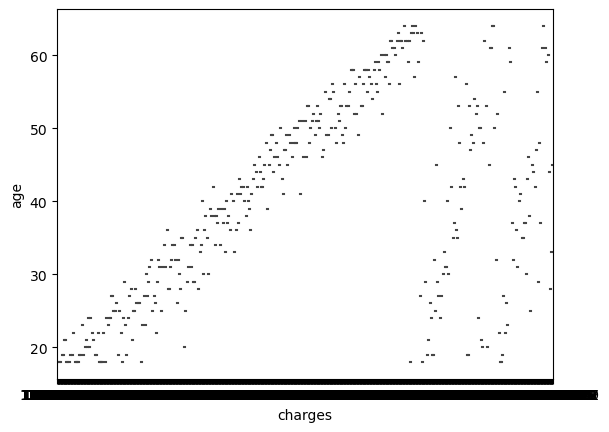

In [4]:
sns.violinplot(data = dfRaw, x = 'charges', y = 'age')

The above violin plot shows the slow yet constant growth of expenses as age increases, but it also greatly shows some outliers between each ages.

<AxesSubplot:xlabel='age', ylabel='charges'>

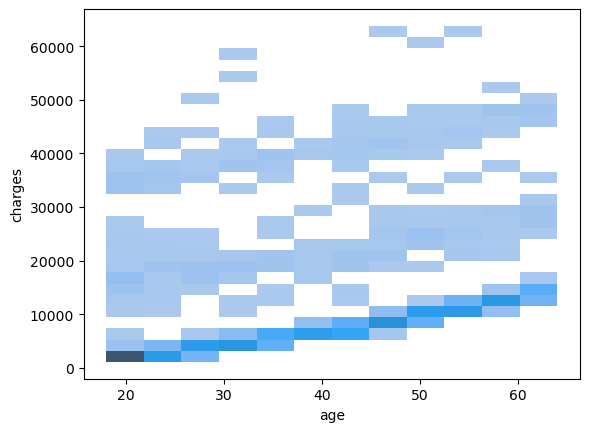

In [31]:
sns.histplot(data = dfRaw, x ='age', y = 'charges')

The above shows a histogram plot similar to the violin plot above but in a nicer, and coloured version. It shows the slow growth of expenses through the ages while showing outliers. THe darker shades indicate a common value relative to the ages.

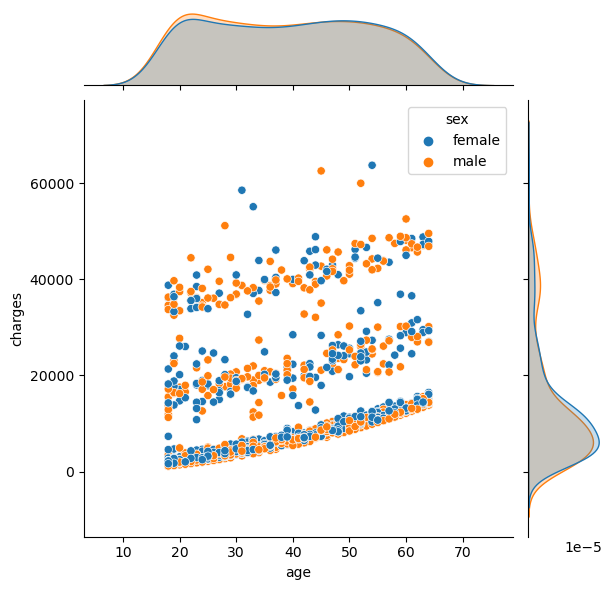

In [40]:
sns.jointplot(data = dfRaw, x ='age', y = 'charges', hue = 'sex')

The above shows a joint plot similar to a histogram plot but more clearly showing the difference in genders. With a near even amount of male and female, the numbers look to be average with an average growth as the sexes grow older.

### Task 2: Analysis Pipeline

Data cleanup:
    Since my research relies on age, sex, and expenses/charges; the other columns will be relevant. While they may 
    provide some context to one's expenses, my research will treat all data as equal except for my chosen columns.

In [3]:
dfRaw = pd.read_csv("../data/raw/insurance/insurance.csv")
dfRaw.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Columns to be taken out: bmi, children, smoker, and region.

In [5]:
dfClean = dfRaw.copy().drop(['bmi', 'children','smoker', 'region'], axis=1).dropna(axis=0)
dfClean.head()

,age,sex,charges
0,19,female,16884.92400
1,18,male,1725.55230
2,28,male,4449.46200
3,33,male,21984.47061
4,32,male,3866.85520


The unwanted columns have been taken out. Next, I will round the charges up to the nearest cent to avoid clutter from the extra decimals.

In [6]:
dfClean['charges'] = dfClean['charges'].round(decimals = 2)
dfClean.head()

,age,sex,charges
0,19,female,16884.92
1,18,male,1725.55
2,28,male,4449.46
3,33,male,21984.47
4,32,male,3866.86


Now, I have all the data I need in an organized way!

### Task 3: Method Chaining

All changes above has been put into project_functions3.py and I will use that to effectively process my dataframe the way I wanted.

In [8]:
import project_functions3 as p3

In [11]:
dfClean = p3.load_and_process("../data/raw/insurance/insurance.csv")
dfCLean.head()

,age,sex,charges
0,19,female,16884.92
1,18,male,1725.55
2,28,male,4449.46
3,33,male,21984.47
4,32,male,3866.86


This looks exactly like the one just above it, meaning the function works!